<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ANALYSIS-AND-INSIGHTS" data-toc-modified-id="ANALYSIS-AND-INSIGHTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANALYSIS AND INSIGHTS</a></span><ul class="toc-item"><li><span><a href="#Set-up" data-toc-modified-id="Set-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#ANALYSIS-AND-INSIGHTS" data-toc-modified-id="ANALYSIS-AND-INSIGHTS-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ANALYSIS AND INSIGHTS</a></span><ul class="toc-item"><li><span><a href="#Do-the-two-plants-receive-the-same-amount-of-solar-energy?" data-toc-modified-id="Do-the-two-plants-receive-the-same-amount-of-solar-energy?-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Do the two plants receive the same amount of solar energy?</a></span></li><li><span><a href="#How-are-these-three-variables-related?" data-toc-modified-id="How-are-these-three-variables-related?-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>How are these three variables related?</a></span></li><li><span><a href="#How-is-irradiance-and-temperature-distributed-throughout-the-day?" data-toc-modified-id="How-is-irradiance-and-temperature-distributed-throughout-the-day?-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>How is irradiance and temperature distributed throughout the day?</a></span></li><li><span><a href="#Are-both-plants-equally-capable-of-generating-DC-from-irradiation?" data-toc-modified-id="Are-both-plants-equally-capable-of-generating-DC-from-irradiation?-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Are both plants equally capable of generating DC from irradiation?</a></span></li><li><span><a href="#Is-the-generation-constant-throughout-the-days?" data-toc-modified-id="Is-the-generation-constant-throughout-the-days?-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Is the generation constant throughout the days?</a></span></li><li><span><a href="#Is-the-DC-to-AC-conversion-generated-correctly?" data-toc-modified-id="Is-the-DC-to-AC-conversion-generated-correctly?-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Is the DC to AC conversion generated correctly?</a></span></li></ul></li><li><span><a href="#CONCLUSIONS" data-toc-modified-id="CONCLUSIONS-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>CONCLUSIONS</a></span></li></ul></li></ul></div>

# ANALYSIS AND INSIGHTS

## Set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True

pd.options.display.float_format = '{:15.2f}'.format
sns.set_style('darkgrid')


## Loading Data

In [2]:
df = pd.read_pickle('../Datos/df.pickle')

In [3]:
df

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
date,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


In [4]:
df_day = pd.read_pickle('../Datos/df_day.pickle')
df_day

,plant,inverter_id,irradiation_min,irradiation_mean,irradiation_max,t_environment_min,t_environment_mean,t_environment_max,t_module_min,t_module_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,efficiency_min,efficiency_mean,efficiency_max,kw_day_max,kw_total_max
date,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,p2,xoJJ8DcxJEcupym,0.00,0.22,0.93,22.20,26.12,31.91,20.88,30.39,...,27443.74,0.00,279.59,1239.95,26840.58,0.00,51.91,98.29,6632.00,209312200.00
2020-06-14,p2,xoJJ8DcxJEcupym,0.00,0.23,0.92,23.65,27.02,32.96,22.12,31.59,...,30768.78,0.00,313.43,1328.21,30088.97,0.00,51.94,99.92,7268.00,209319687.00
2020-06-15,p2,xoJJ8DcxJEcupym,0.00,0.19,0.83,24.00,26.56,31.61,23.00,30.00,...,25597.24,0.00,260.93,1256.67,25049.49,0.00,52.94,98.27,7412.67,209325949.00


## ANALYSIS AND INSIGHTS

The first lever is the reception of solar energy.

We have 3 kpis with which to measure this lever: incoming irradiation, ambient temperature and module temperature.

These kpis are measured with only one sensor per plant, so the data is the same for all inverters.

We need to understand how these variables work with each other before moving on to see how they interact with the next level.

Since it doesn't matter the inverter and we only need these 3 variables we are going to create a smaller dataset with only one inverter from each plant to work on.



In [5]:
reception = df.loc[(df['inverter_id'] == '1BY6WEcLGh8j5v7') | (df['inverter_id'] == 'q49J1IKaHRwDQnt'), 'plant':'t_module']
reception

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module
date,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86
2020-05-15 00:15:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.08,22.76
2020-05-15 00:30:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,24.94,22.59
2020-05-15 00:45:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,24.85,22.36
2020-05-15 01:00:00,p1,5,15,1,HmiyD2TTLFNqkNe,0.00,24.62,22.17
...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,p2,6,17,22,iq8k7ZNt4Mwm3w0,0.00,23.51,22.86
2020-06-17 23:00:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.48,22.74
2020-06-17 23:15:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.35,22.49


### Do the two plants receive the same amount of solar energy?

In [6]:
temp = reception.groupby('plant').agg({'irradiation': sum, 't_environment':np.mean, 't_module': np.mean})
temp

,irradiation,t_environment,t_module
plant,,,
p1,726.40,25.56,31.18
p2,758.49,28.07,32.77


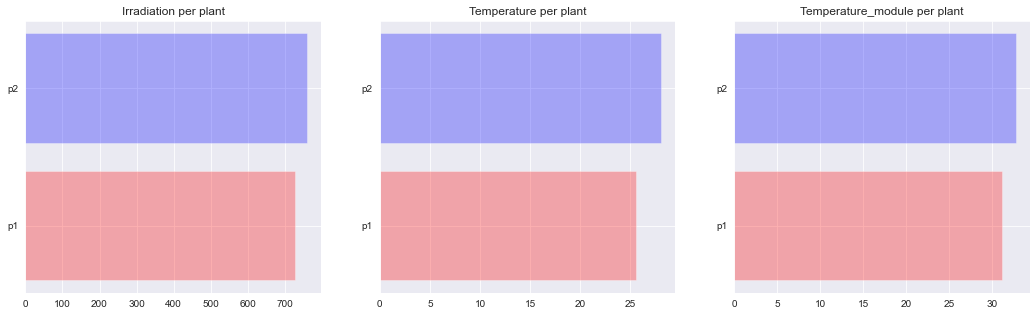

In [9]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

ax[0].barh(temp.index, temp['irradiation'], color = ['red', 'blue'], alpha = 0.3)
ax[1].barh(temp.index, temp['t_environment'], color = ['red', 'blue'], alpha = 0.3)
ax[2].barh(temp.index, temp['t_module'], color = ['red', 'blue'], alpha = 0.3);

ax[0].set_title('Irradiation per plant')
ax[1].set_title('Temperature per plant')
ax[2].set_title('Temperature_module per plant');

Conclusions:

* In general, plant 2 receives more solar energy than plant 1.
* But this difference cannot imply the yield problem that supposedly exists.

### How are these three variables related?

In [8]:
reception


,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module
date,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86
2020-05-15 00:15:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.08,22.76
2020-05-15 00:30:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,24.94,22.59
2020-05-15 00:45:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,24.85,22.36
2020-05-15 01:00:00,p1,5,15,1,HmiyD2TTLFNqkNe,0.00,24.62,22.17
...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,p2,6,17,22,iq8k7ZNt4Mwm3w0,0.00,23.51,22.86
2020-06-17 23:00:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.48,22.74
2020-06-17 23:15:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.35,22.49


In [9]:
temp = reception.loc[:,['plant', 'irradiation', 't_environment', 't_module']]
temp

,plant,irradiation,t_environment,t_module
date,,,,
2020-05-15 00:00:00,p1,0.00,25.18,22.86
2020-05-15 00:15:00,p1,0.00,25.08,22.76
2020-05-15 00:30:00,p1,0.00,24.94,22.59
2020-05-15 00:45:00,p1,0.00,24.85,22.36
2020-05-15 01:00:00,p1,0.00,24.62,22.17
...,...,...,...,...
2020-06-17 22:45:00,p2,0.00,23.51,22.86
2020-06-17 23:00:00,p2,0.00,23.48,22.74
2020-06-17 23:15:00,p2,0.00,23.35,22.49


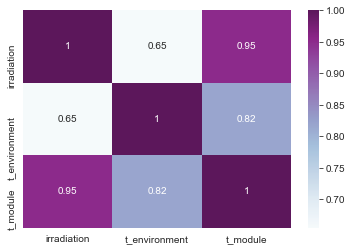

In [10]:
sns.heatmap(temp.corr(), annot = True, cmap = 'BuPu', alpha = 0.9);

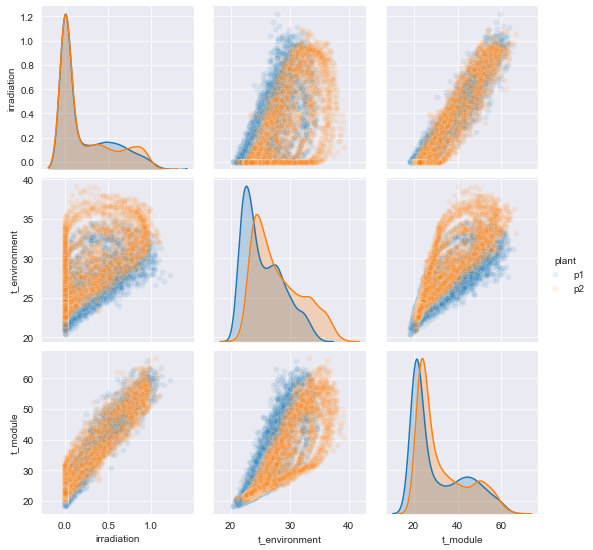

In [11]:
sns.pairplot(temp, hue = 'plant', plot_kws = {'alpha': 0.1});

Conclusions:

* Irradiance correlates strongly with module temperature.
* But not so much with ambient temperature
* Therefore a first way to identify defective or dirty modules is to locate those that produce little when irradiance is high.

### How is irradiance and temperature distributed throughout the day?

In [12]:
temp = pd.crosstab(reception.hour, reception.plant, values = reception.irradiation, aggfunc='mean')
temp

plant,p1,p2
hour,,
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.04,0.04
7,0.19,0.19
8,0.37,0.39


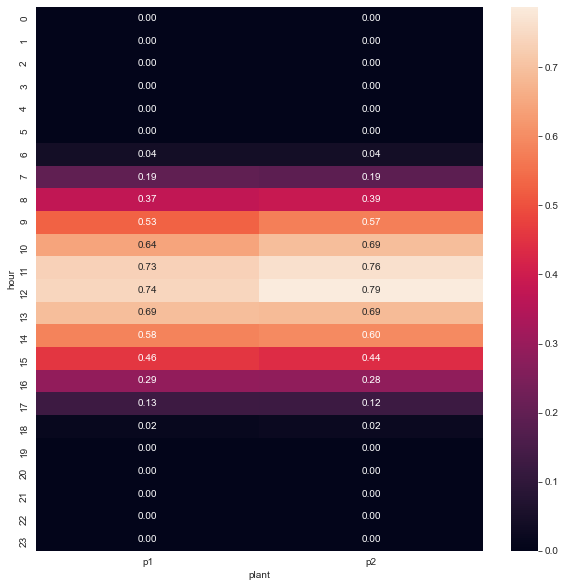

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(temp, annot = True, fmt = '.2f');

In [14]:
temp = pd.crosstab(reception.hour, reception.plant, values = reception.t_environment, aggfunc = 'mean')
temp

plant,p1,p2
hour,,
0,22.80,25.20
1,22.63,24.82
2,22.46,24.48
3,22.32,24.27
4,22.17,24.07
5,22.06,23.91
6,22.20,24.19
7,23.34,25.48
8,24.92,27.05


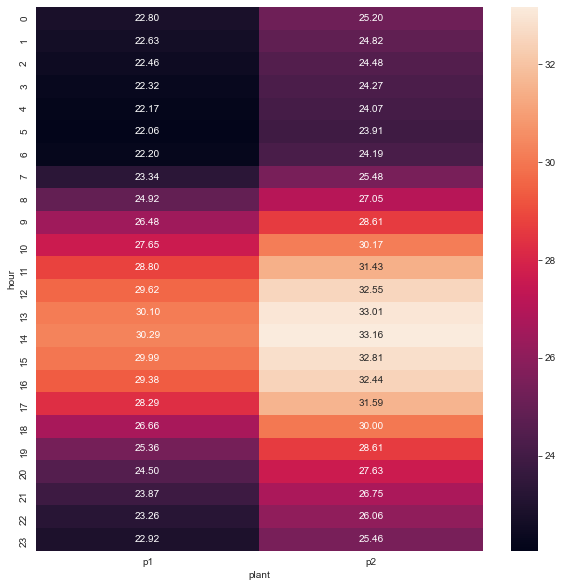

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(temp, annot = True, fmt = '.2f');

Conclusions:

* Both plants have similar patterns. We could think that they are in geographic zones that are not very far apart.
* There is irradiation (and therefore, a priori, the plants should produce) between 7 and 17 o'clock.
* The maximum irradiation occurs between 11 and 12 o'clock.
* The maximum ambient temperature is between 14 and 16 o'clock.

### Are both plants equally capable of generating DC from irradiation?

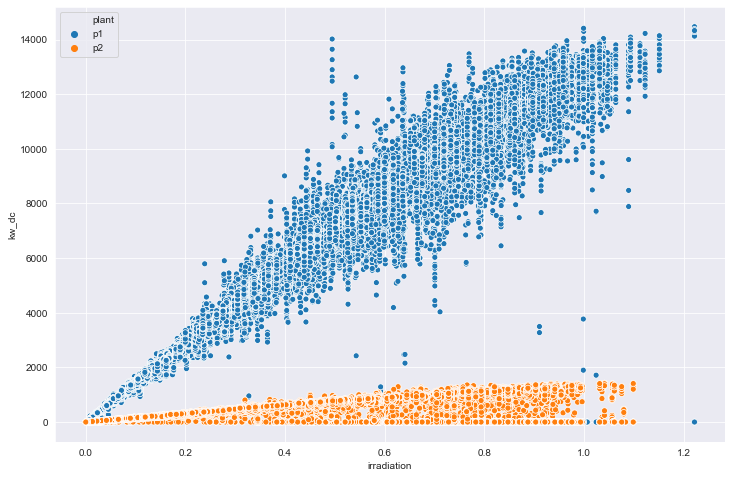

In [17]:
plt.figure(figsize =(12,8))
sns.scatterplot(data = df, x = df.irradiation, y = df.kw_dc, hue = 'plant');

Plant number 2 produces much less kw at the same irradiation levels.

But earlier we had seen that the relationship between dc and ac in plant 1 was strange.

And also that the dc and ac data did not agree with the kw_day data.

There is something strange in the data.

Let's look at the relationship between irradiance and kw_dia to see if it gives us light.

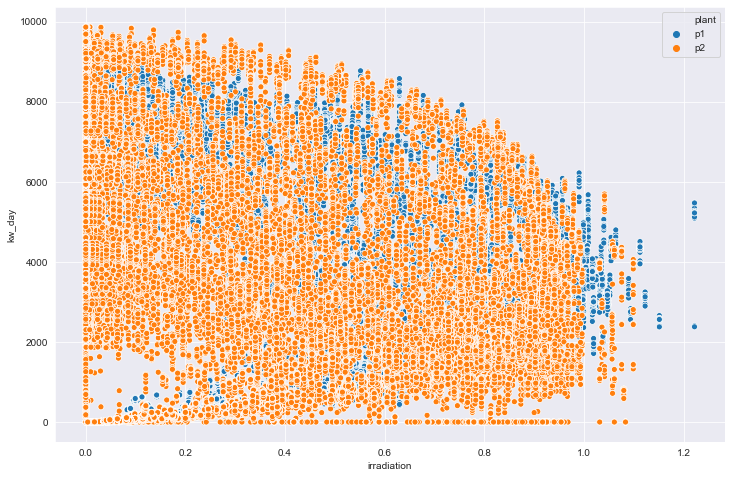

In [18]:
plt.figure(figsize =(12,8))
sns.scatterplot(data = df, x = df.irradiation, y = df.kw_day, hue = 'plant');

It is very strange. It seems that the relationship is that the more irradiation the less kw generated. Which does not make sense.

It even seems that the maximum kw peaks occur at hours of zero irradiance.

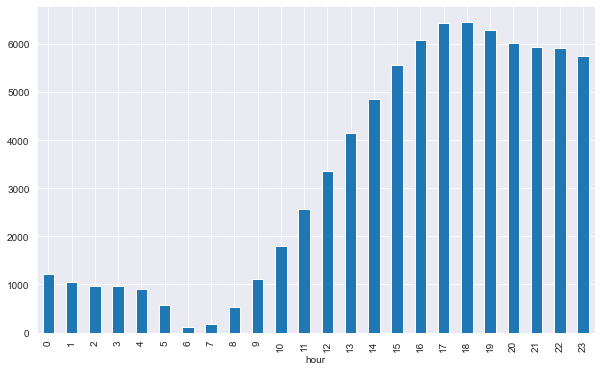

In [19]:
plt.figure(figsize = (10,6))
df.groupby('hour')['kw_day'].mean().plot.bar();

Again something is wrong. There is generation between 00 and 06.

And also after 18 o'clock it starts to decay, which should not happen if it is an accumulated.

Conclusion:

* We do not trust these accumulated variables such as kw_day and kw_total.

* But the truth is that we do not rely much on the others either.

* **In a real situation I would stop the project until we are able to see what happens with the data. With the help of a professional in the area that would help us to understand the atypical behaviors of these variables or to elucidate if they are problems with the data acquisition.**

But in order to continue we are going to assume that the dc and ac data are correct.

And under that assumption we will get our conclusions.



**INSIGHT #1**

Plant 2 generates much lower levels of DC even at similar irradiance levels.

### Is the generation constant throughout the days?

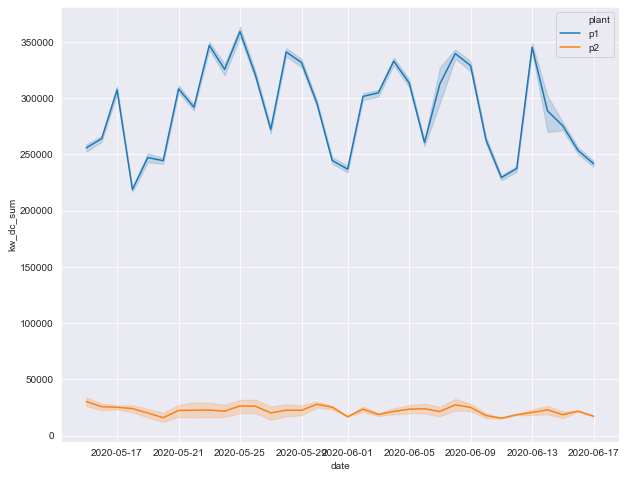

In [20]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_day, x = df_day.index, y = df_day.kw_dc_sum, hue = 'plant');

We see that plant 1 has much more variability while plant 2 is much more constant.

But above all we are surprised by the low levels of DC generation in plant 2 compared to plant 1.

Let's examine each day's generation to see if we see anything unusual.

In [21]:
df['date1'] = df.index.date
df

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date1
date,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00,2020-06-17


In [22]:
df_kw_dc_per_day_p1 = df[df.plant == 'p1'].groupby(['plant','date1','hour'])['kw_dc'].sum()
df_kw_dc_per_day_p1

plant  date1       hour
p1     2020-05-15  0                 0.00
                   1                 0.00
                   2                 0.00
                   3                 0.00
                   4                 0.00
                                ...      
       2020-06-17  19                0.00
                   20                0.00
                   21                0.00
                   22                0.00
                   23                0.00
Name: kw_dc, Length: 796, dtype: float64

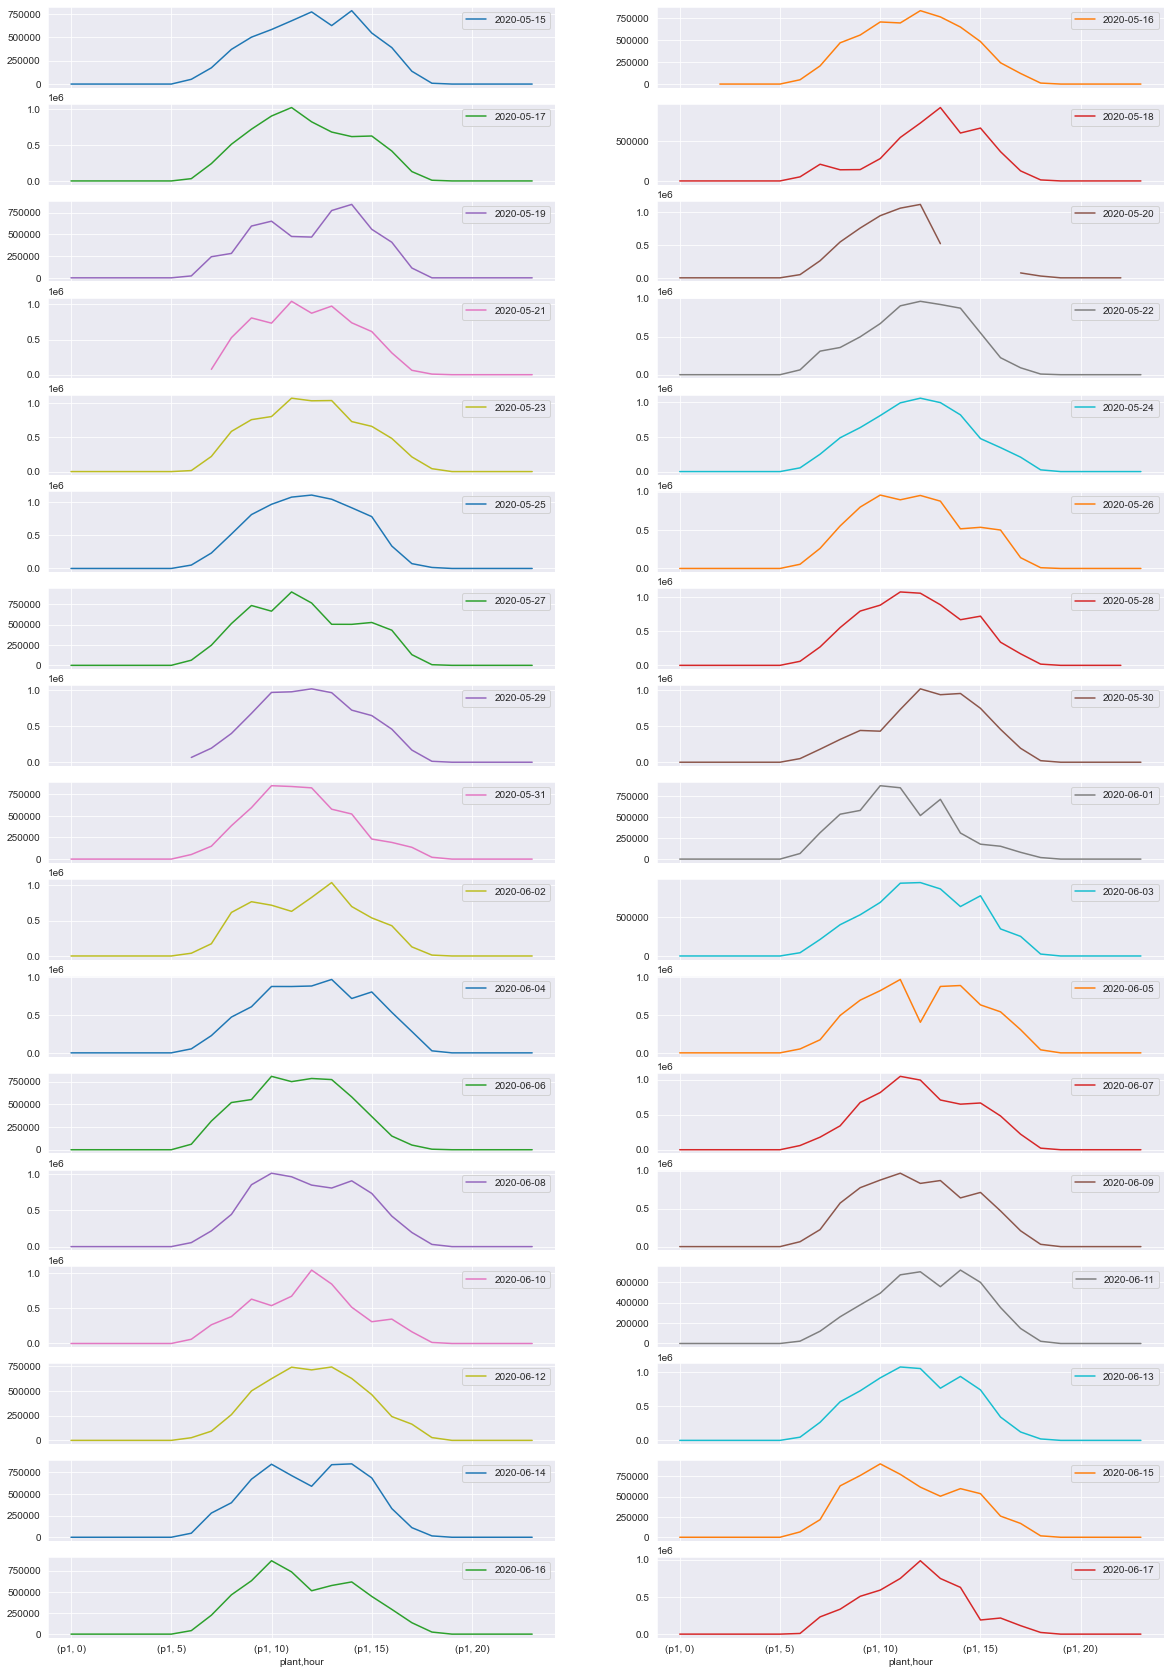

In [23]:
df_kw_dc_per_day_p1.unstack(level=1).plot(subplots = True, layout =(17,2), sharex = True, figsize = (20,30));

Conclusions:

* On plant 1, similar patterns are maintained on all days.
* With the exception of a break on May 20 and a strange drop on June 5.
* But none of these appear to be structural
* Therefore, although each day may have different production totals, the intraday patterns are similar and seem to be correct.

In [24]:
df_kw_dc_per_day_p2 = df[df.plant == 'p2'].groupby(['plant','date1','hour'])['kw_dc'].sum()
df_kw_dc_per_day_p2

plant  date1       hour
p2     2020-05-15  0                 0.00
                   1                 0.00
                   2                 0.00
                   3                 0.00
                   4                 0.00
                                ...      
       2020-06-17  19                0.00
                   20                0.00
                   21                0.00
                   22                0.00
                   23                0.00
Name: kw_dc, Length: 816, dtype: float64

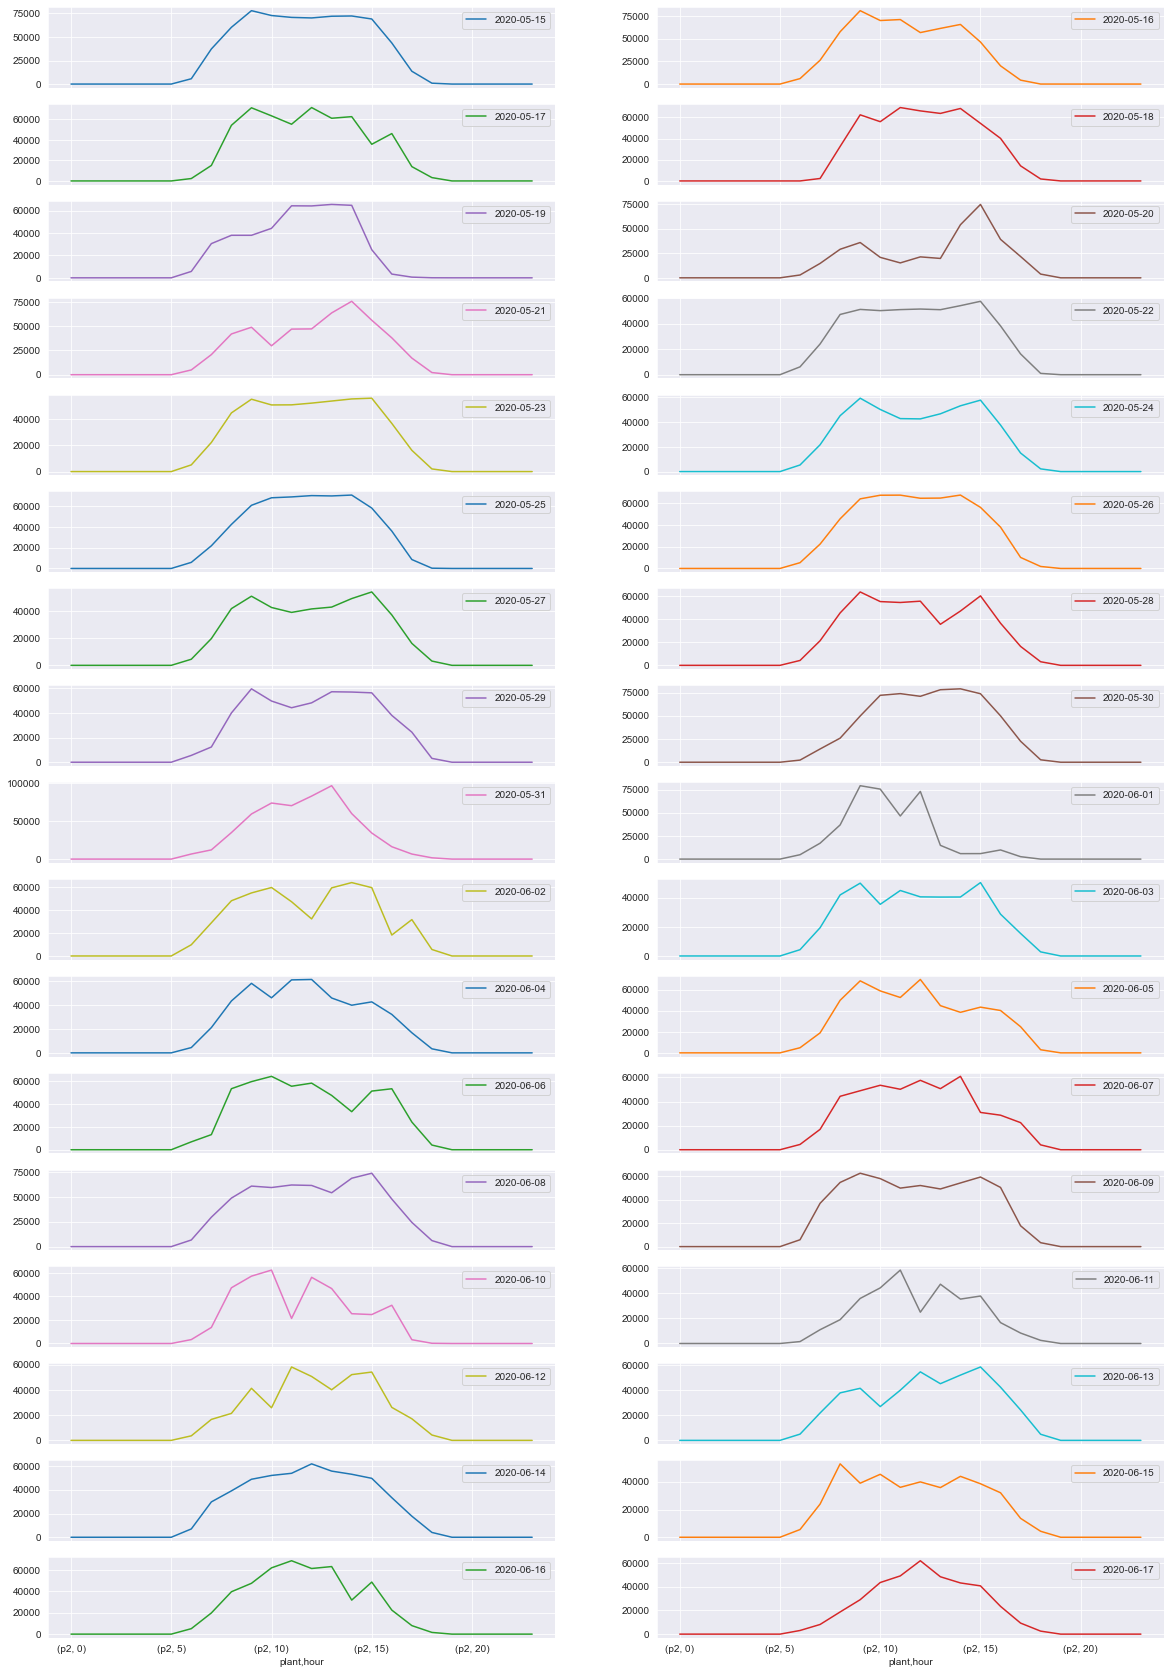

In [25]:
df_kw_dc_per_day_p2.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex = True, figsize = (20,30));

Conclusions:

* Again the 20th of May appears with an unusual behavior.
* The production levels are constant during the days, but always about 10 times below the levels of plant 1.

**INSIGHT #2:** The low levels of **solar plant 2** are constant and present daily curves that appear normal.

### Is the DC to AC conversion generated correctly?

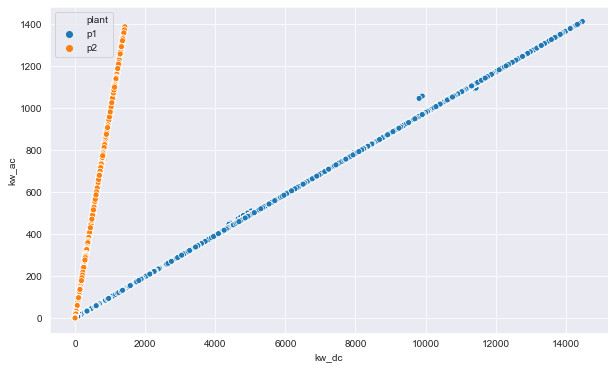

In [26]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = df.kw_dc, y = df.kw_ac, hue = 'plant');

Again the patterns are very clear: plant 2 transforms the current much more efficiently.

Let's expand by analyzing the efficiency variable we had created.

In [27]:
temp = df.groupby(['plant','hour'], as_index = False)['efficiency'].mean()
temp

,plant,hour,efficiency
0,p1,0,0.00
1,p1,1,0.00
2,p1,2,0.00
3,p1,3,0.00
4,p1,4,0.00
5,p1,5,0.00
6,p1,6,9.20
7,p1,7,9.80
8,p1,8,9.81
9,p1,9,9.78


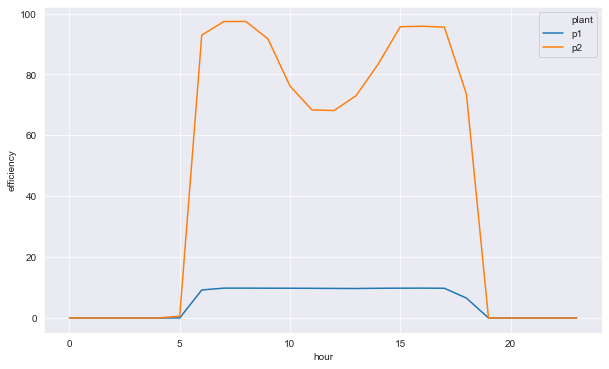

In [28]:
plt.figure(figsize = (10,6))
sns.lineplot(data = temp, x = 'hour', y = 'efficiency', hue = 'plant');

**INSIGHT #3**

Plant 1 has very low DC to AC conversion capability, suggesting problems with inverters.

Other conclusions:

* Go into the detail of the inverters of plant 1, to see if they are all of them or if there are some that skew the average.
* Review why plant 2 loses efficiency during peak irradiation hours.

Let's start with the second one, comparing DC production with AC production in plant 2.



In [29]:
temp = df[['plant', 'hour', 'kw_dc', 'kw_ac']].melt(id_vars = ['plant', 'hour'])
temp

,plant,hour,variable,value
0,p1,0,kw_dc,0.00
1,p1,0,kw_dc,0.00
2,p1,0,kw_dc,0.00
3,p1,0,kw_dc,0.00
4,p1,0,kw_dc,0.00
...,...,...,...,...
272939,p2,23,kw_ac,0.00
272940,p2,23,kw_ac,0.00
272941,p2,23,kw_ac,0.00
272942,p2,23,kw_ac,0.00


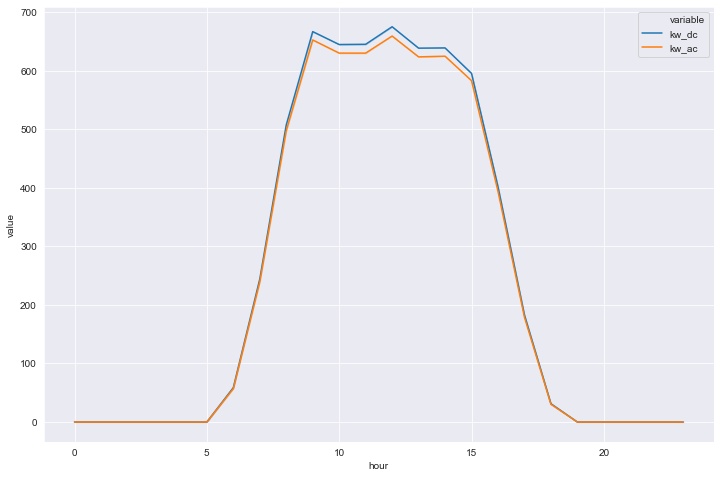

In [30]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = temp[temp['plant'] == 'p2'], x = 'hour', y = 'value', hue = 'variable', ci = False);


We see that there is indeed a loss of efficiency in the central hours. But nowhere near the level of loss that we had seen in the previous analysis.

Let's analyze the distribution of efficiency in those hours.

In [31]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp['plant'] == 'p2']
temp

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date1
date,,,,,,,,,,,,,,,
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,4UPUqMRk7TRMgml,581.05,569.41,98.00,554.00,2429565.00,2020-05-15
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,81aHJ1q11NBPMrL,534.67,524.09,98.02,516.60,1215279252.60,2020-05-15
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,9kRcWv60rDACzjR,568.53,557.16,98.00,551.80,2247720128.80,2020-05-15
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,Et9kgGMDl729KT4,526.24,515.83,98.02,503.00,1704753.00,2020-05-15
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,IQ2d7wF4YD8zU1Q,578.17,566.58,97.99,552.79,19942078.79,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,q49J1IKaHRwDQnt,562.34,551.13,98.01,3380.87,519981.87,2020-06-17
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,rrq4fwE8jgrTyWY,534.27,523.71,98.02,3190.40,121130615.40,2020-06-17
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,vOuJvMaM2sgwLmb,578.85,567.15,97.98,3534.07,2426903.07,2020-06-17


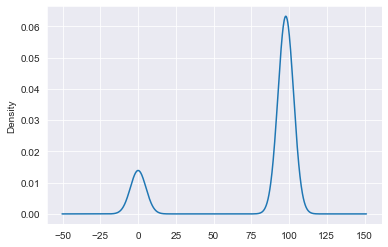

In [32]:
temp.efficiency.plot.density();

There is a set of data with zero efficiency, and that is what generates the problem. But what is the cause of that zero efficiency?

Let's select those cases and review them.

In [33]:
temp[temp['kw_dc'] == 0]

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date1
date,,,,,,,,,,,,,,,
2020-05-15 09:45:00,p2,5,15,9,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,81aHJ1q11NBPMrL,0.00,0.00,0.00,1645.00,1215280381.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,Et9kgGMDl729KT4,0.00,0.00,0.00,1541.00,1705791.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,Quc1TzYxW2pYoWX,0.00,0.00,0.00,1324.00,329510409.00,2020-05-15
2020-05-15 09:45:00,p2,5,15,9,iq8k7ZNt4Mwm3w0,0.80,31.38,45.72,xoJJ8DcxJEcupym,0.00,0.00,0.00,1735.00,209145328.00,2020-05-15
2020-05-15 10:00:00,p2,5,15,10,iq8k7ZNt4Mwm3w0,0.83,31.89,46.13,81aHJ1q11NBPMrL,0.00,0.00,0.00,1645.00,1215280381.00,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-16 14:30:00,p2,6,16,14,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,q49J1IKaHRwDQnt,0.00,0.00,0.00,0.00,34379.33,2020-06-16
2020-06-16 14:30:00,p2,6,16,14,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,rrq4fwE8jgrTyWY,0.00,0.00,0.00,0.00,8075096.33,2020-06-16
2020-06-16 14:30:00,p2,6,16,14,iq8k7ZNt4Mwm3w0,0.56,30.83,44.38,vOuJvMaM2sgwLmb,0.00,0.00,0.00,0.00,173022.79,2020-06-16


It seems that it is not a problem of the inverter, but that no DC has been generated at that time.

Let's set the condition that DC > 0 and see what the efficiency is.

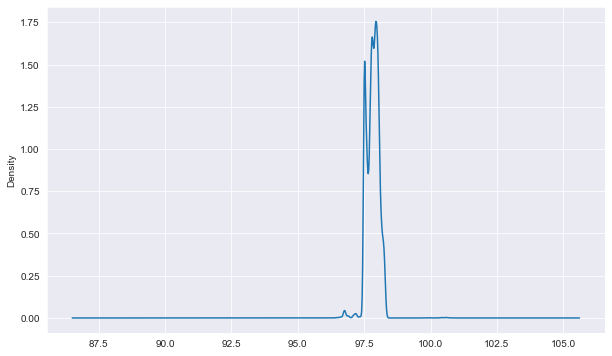

In [34]:
plt.figure(figsize = (10,6))
temp[temp['kw_dc'] > 0].efficiency.plot.kde();

Indeed when there is DC the efficiency is above 96%.

The question then is why there is no DC, is there a pattern?

Let's create an indicator of DC = 0 in order to analyze it.

In [35]:
temp['kw_dc_zero'] = np.where(temp['efficiency'] == 0, 1, 0)
temp

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date1,kw_dc_zero
date,,,,,,,,,,,,,,,,
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,4UPUqMRk7TRMgml,581.05,569.41,98.00,554.00,2429565.00,2020-05-15,0
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,81aHJ1q11NBPMrL,534.67,524.09,98.02,516.60,1215279252.60,2020-05-15,0
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,9kRcWv60rDACzjR,568.53,557.16,98.00,551.80,2247720128.80,2020-05-15,0
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,Et9kgGMDl729KT4,526.24,515.83,98.02,503.00,1704753.00,2020-05-15,0
2020-05-15 08:00:00,p2,5,15,8,iq8k7ZNt4Mwm3w0,0.46,27.68,35.71,IQ2d7wF4YD8zU1Q,578.17,566.58,97.99,552.79,19942078.79,2020-05-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,q49J1IKaHRwDQnt,562.34,551.13,98.01,3380.87,519981.87,2020-06-17,0
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,rrq4fwE8jgrTyWY,534.27,523.71,98.02,3190.40,121130615.40,2020-06-17,0
2020-06-17 15:00:00,p2,6,17,15,iq8k7ZNt4Mwm3w0,0.36,27.23,29.35,vOuJvMaM2sgwLmb,578.85,567.15,97.98,3534.07,2426903.07,2020-06-17,0


We start with the numerical variables.

In [36]:
temp.groupby(['kw_dc_zero'])['irradiation','t_environment', 't_module'].mean()

C:\Users\DAZAG\AppData\Local\Temp/ipykernel_24428/3929974516.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp.groupby(['kw_dc_zero'])['irradiation','t_environment', 't_module'].mean()


,irradiation,t_environment,t_module
kw_dc_zero,,,
0,0.59,30.48,44.32
1,0.80,32.48,52.03


In ambient temperature there is not much difference, but in module temperature and irradiance there is.

Could it be that if it gets too hot the module stops generating DC?

Let's look at this by comparing module temperature with DC generation.

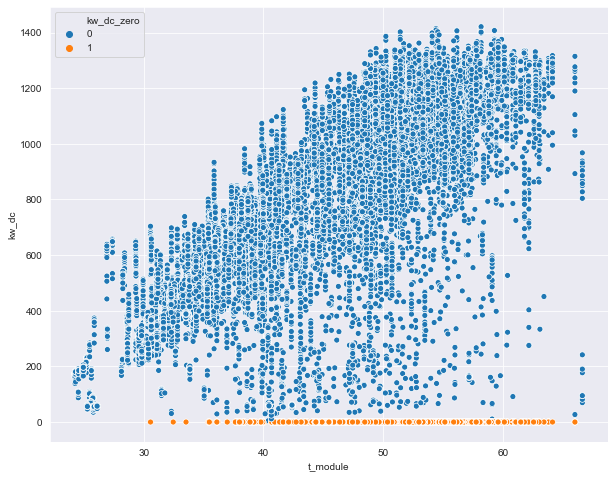

In [37]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = temp, x = 't_module', y = 'kw_dc', hue = 'kw_dc_zero');

The above hypothesis is not confirmed, since there are many cases of high temperatures where DC is generated, and also of kw_dc equal to zero in almost all temperature ranges.

Let us now analyze the categorical ones, starting with the inverter.

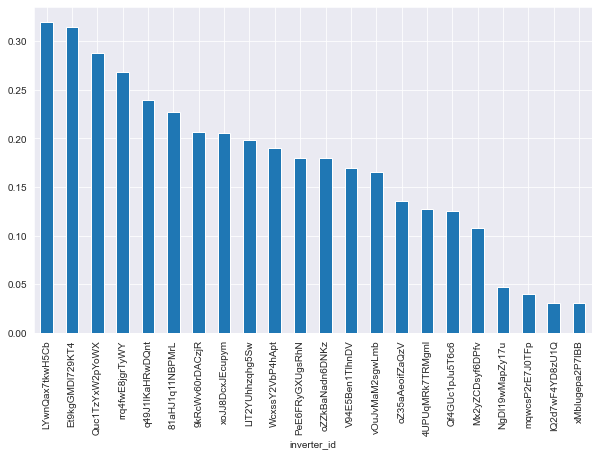

In [38]:
plt.figure(figsize = (10, 6))
temp.groupby('inverter_id')['kw_dc_zero'].mean().sort_values(ascending = False).plot.bar();

There is a great difference in the percentage of zero DC production per inverter.

From some with less than 5% to some with more than 30%.

**INSIGHT #4:**: In plant 2 there are several inverters that are not getting enough DC production, and therefore their modules need to be overhauled.

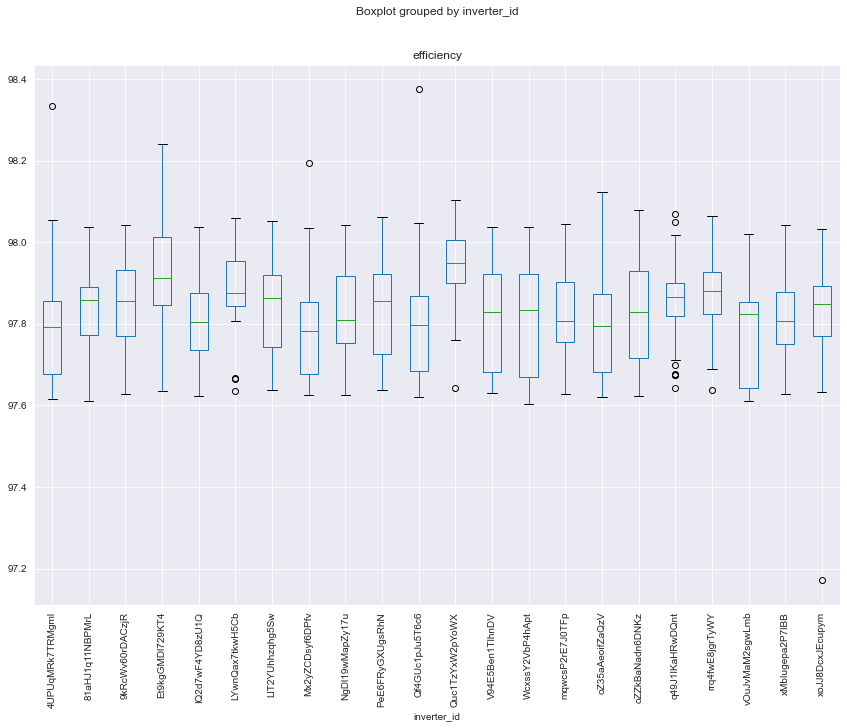

In [39]:
temp[temp['kw_dc'] > 0].groupby(['inverter_id', 'date1' ], as_index = False).efficiency.mean().boxplot(column = 'efficiency', by = 'inverter_id', figsize=(14,10))
plt.xticks(rotation = 90);

**INSIGHT #5:**: Once the problem of no DC generation is discounted, the inverters in plant 2 do work well and do the job of transforming to AC.

To finish analyzing the efficiency of the inverters, we can look at their performance on each day to see if there have been any specific problems.

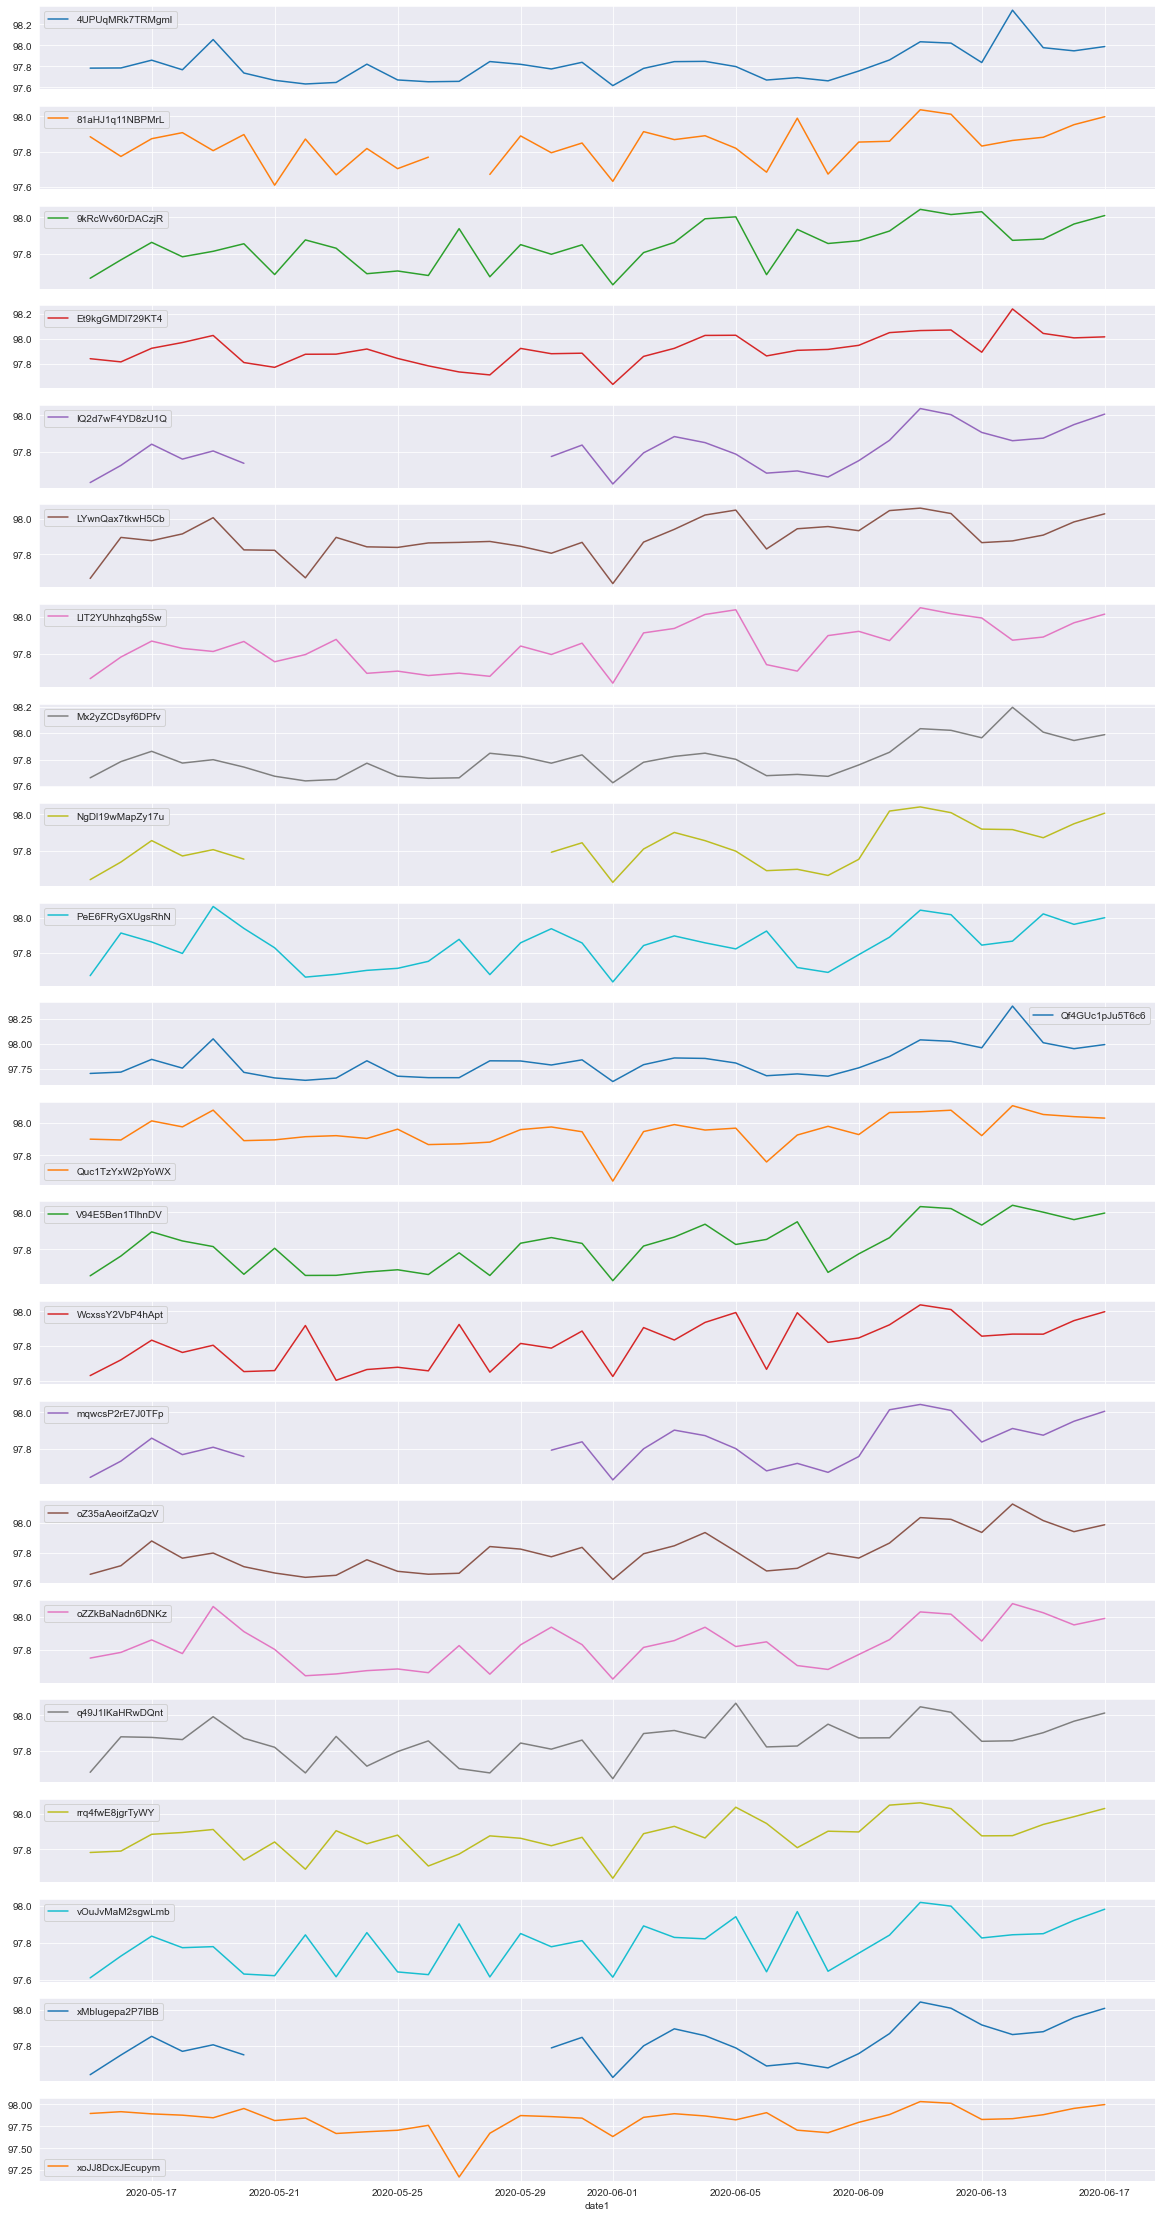

In [48]:
temp[temp['kw_dc'] > 0].groupby(['inverter_id', 'date1']).efficiency.mean().unstack(level = 0).plot(subplots = True, sharex = True, figsize =(20,40));

In the inverter analysis we see again that all data are constant. In some inverters the flow is interrupted for a few days.

Let's check that there are then no failures in DC generation.

**Now we continue with solar plant 1**

In [62]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp['plant'] == 'p1']
temp['kw_dc_zero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

,plant,month,day,hour,sensor_id,irradiation,t_environment,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date1,kw_dc_zero
date,,,,,,,,,,,,,,,,
2020-05-15 08:00:00,p1,5,15,8,HmiyD2TTLFNqkNe,0.20,25.42,31.41,1BY6WEcLGh8j5v7,3246.00,318.67,9.82,263.57,6259822.57,2020-05-15,0
2020-05-15 08:00:00,p1,5,15,8,HmiyD2TTLFNqkNe,0.20,25.42,31.41,1IF53ai7Xc0U56Y,2805.62,275.46,9.82,292.50,6183937.50,2020-05-15,0
2020-05-15 08:00:00,p1,5,15,8,HmiyD2TTLFNqkNe,0.20,25.42,31.41,3PZuoBAID5Wc2HD,2736.12,268.62,9.82,287.75,6988046.75,2020-05-15,0
2020-05-15 08:00:00,p1,5,15,8,HmiyD2TTLFNqkNe,0.20,25.42,31.41,7JYdWkrLSPkdwr4,2741.50,269.15,9.82,281.00,7603241.00,2020-05-15,0
2020-05-15 08:00:00,p1,5,15,8,HmiyD2TTLFNqkNe,0.20,25.42,31.41,McdE0feGgRqW7Ca,3208.88,315.05,9.82,291.00,7159255.00,2020-05-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 15:00:00,p1,6,17,15,HmiyD2TTLFNqkNe,0.32,28.62,39.95,uHbuxQJl8lW7ozc,4719.62,462.89,9.81,5423.50,7286458.50,2020-06-17,0
2020-06-17 15:00:00,p1,6,17,15,HmiyD2TTLFNqkNe,0.32,28.62,39.95,wCURE6d3bPkepu2,5077.75,497.80,9.80,5343.75,7028061.75,2020-06-17,0
2020-06-17 15:00:00,p1,6,17,15,HmiyD2TTLFNqkNe,0.32,28.62,39.95,z9Y9gH1T5YWrNuG,5113.00,501.29,9.80,5282.88,7250667.88,2020-06-17,0


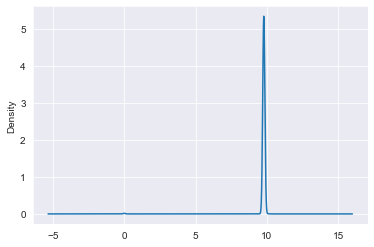

In [63]:
temp['efficiency'].plot.density();

Transformation efficiency in plant one is very poor, around 10%.

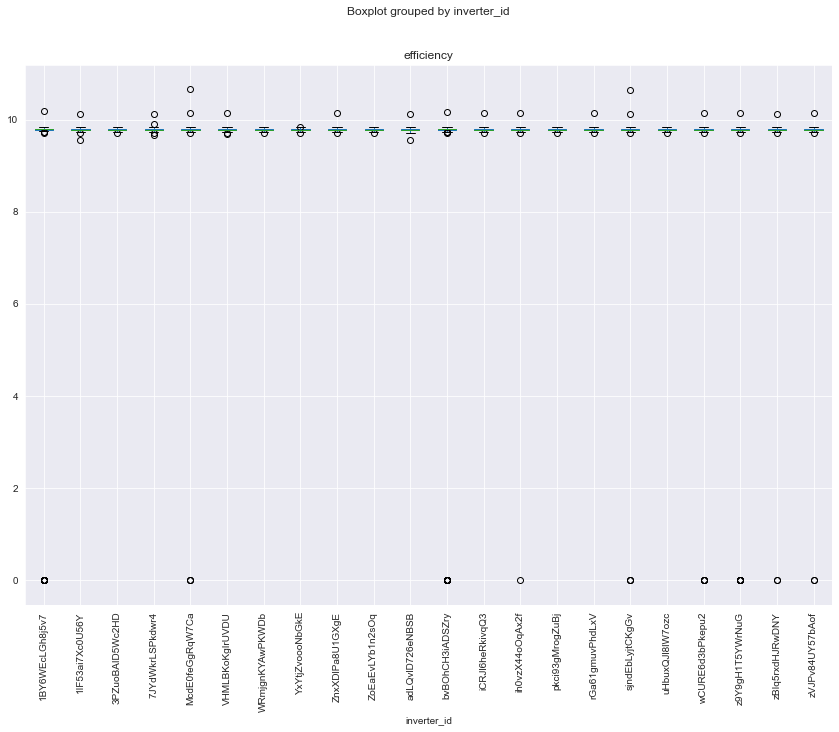

In [71]:
temp.groupby(['inverter_id', 'date' ], as_index = False)['efficiency'].mean().boxplot(column = 'efficiency', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

The transformation efficiency of inverters is constant but very low.

In the data quality stage we detected that the data had problems at the source. But we assumed for the purposes of this exercise that the data were fine.

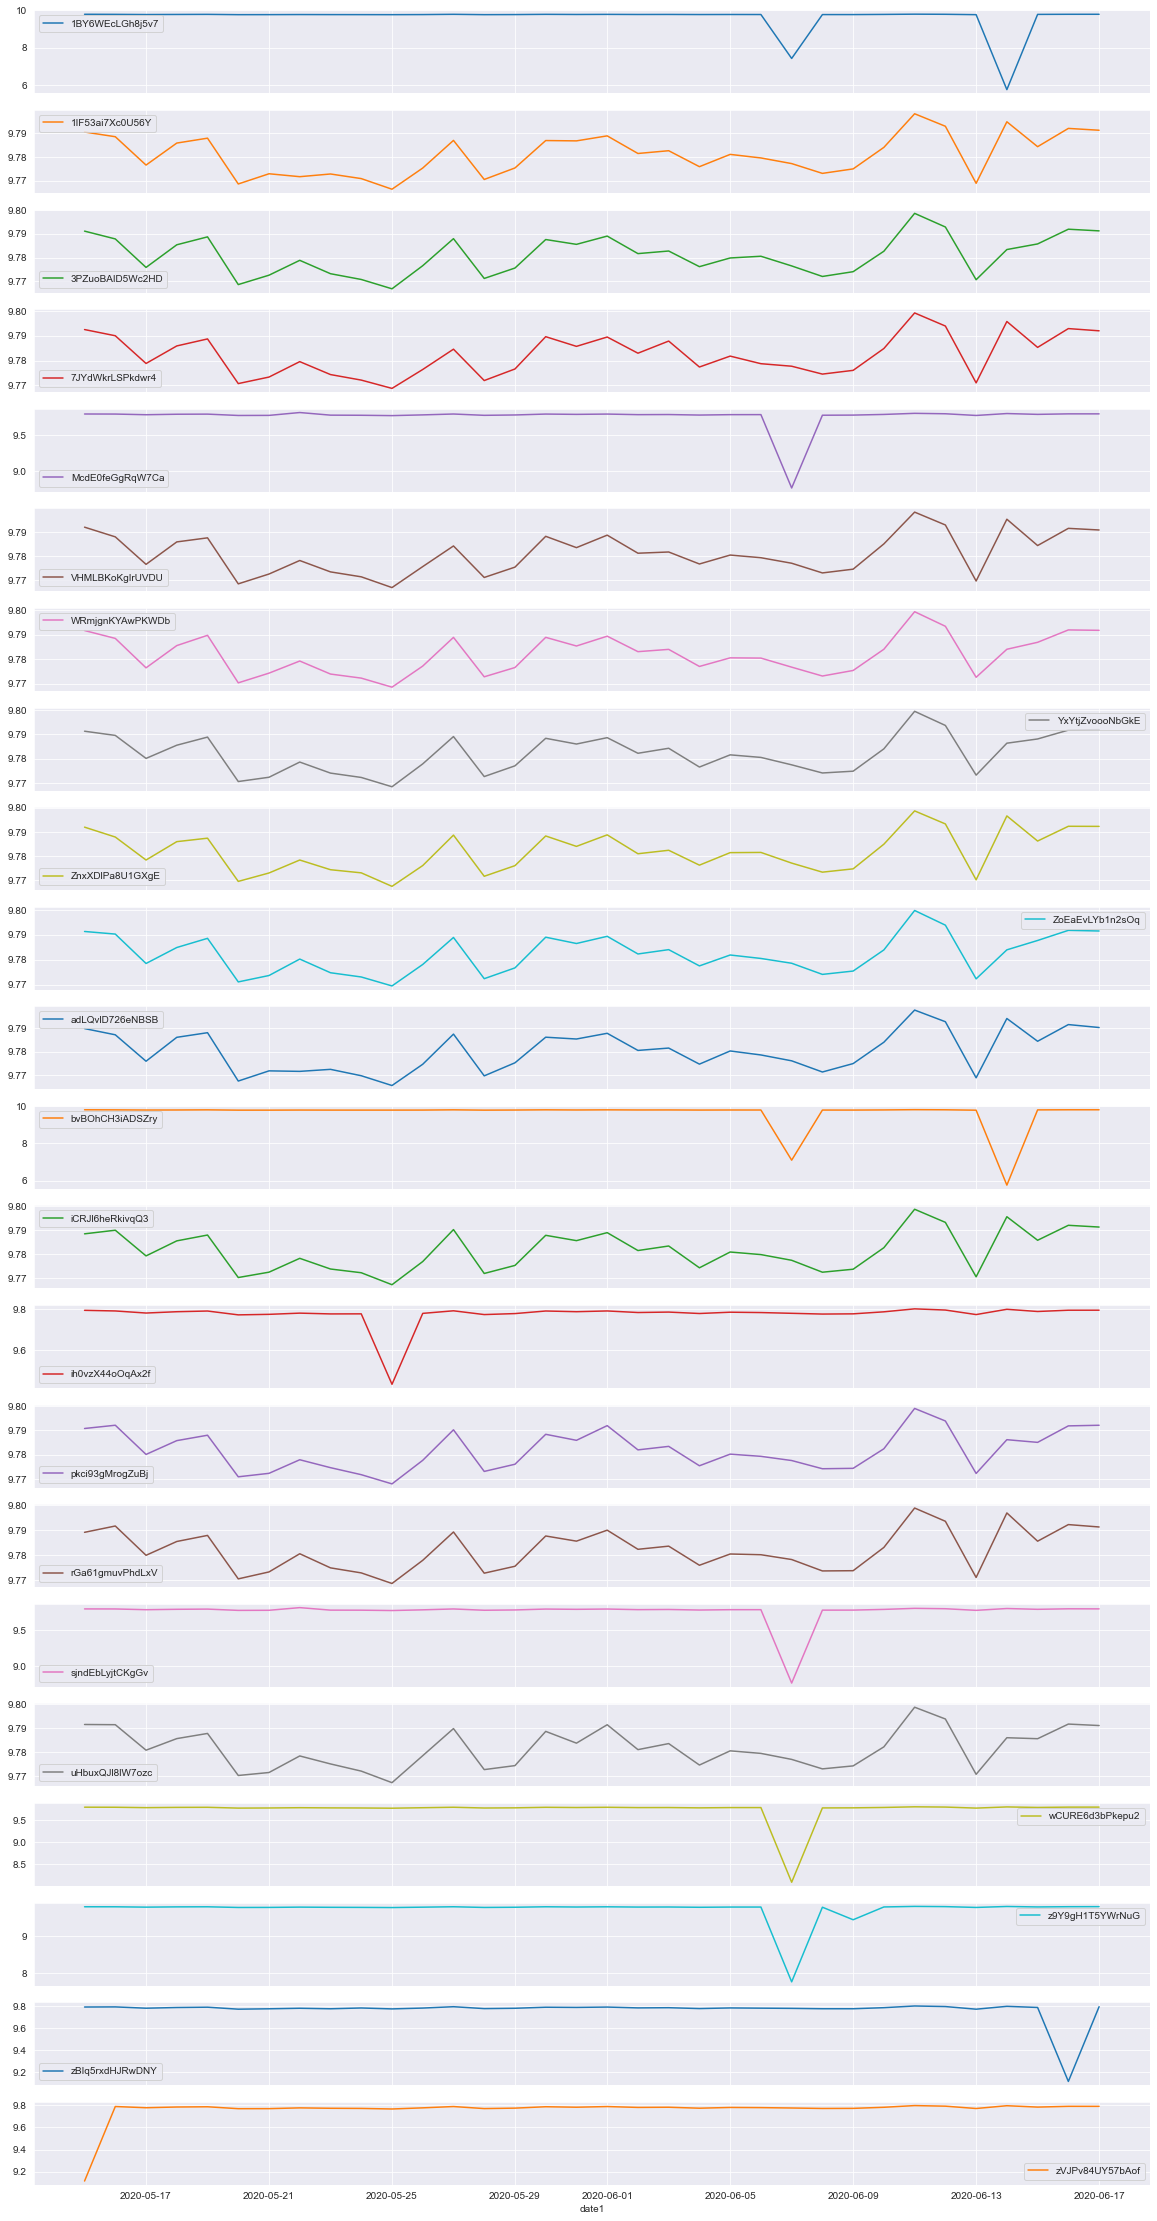

In [77]:
temp.groupby(['inverter_id', 'date1'])['efficiency'].mean().unstack(level = 0).plot(subplots = True, sharex = True, figsize = (20,40));

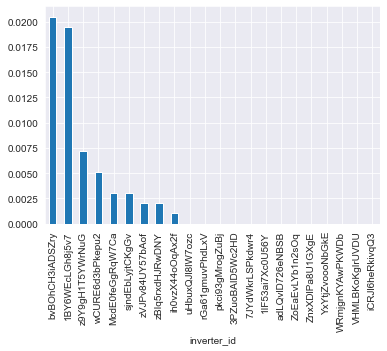

In [81]:
temp.groupby('inverter_id')['kw_dc_zero'].mean().sort_values(ascending = False).plot.bar();

We can see that although there are some inverters that have had failures, their magnitude is less than 2% of the measurements.

Therefore the DC generation in plant 1 is correct, and the failure is in the DC to AC transformation.

## CONCLUSIONS

**After an analysis of the data we can conclude that:**
    
* There are serious data quality problems. The part of the chain where these problems are generated, including the plant meters, should be reviewed.
* The fact that the DC generation is about 10 times higher in plant 1 than in plant 2, added to the fact that the efficiency in plant 1 is over 10% leads us to think that the DC generation data in plant 1 may be artificially scaled for some reason.
* But for the time being, in the absence of verification, we will assume that the data are correct.
* The two plants have received high amounts of irradiation, we have not found any problem at this stage.
* Although the ambient temperature is higher in plant 2 and its modules are warmer than those of plant 1, this does not seem to have a significant impact.
* The DC generation of plant 1 works well, the modules seem to bring DC to the inverters.
* The DC generation of plant 2 does NOT work well, some modules bring very little DC to the inverters even at peak irradiation hours.
* The DC to AC transformation of plant 1 does NOT work well, only about 10% is transformed, although constantly. And this low efficiency is not due to moments of non-reception of DC nor is it concentrated in specific inverters, but it seems to be more structural (again, keep in mind that it could be due to a data quality problem in kw_dc of plant 1).
* The DC to AC transformation of plant 2 works well, since once the periods of zero DC generation are eliminated the rest have an efficiency above 97%.

**Recommendations:**

* Review data capture and reliability.
* Maintenance review of the inverter modules of plant 2 where there are many moments of zero DC generation.
* Maintenance review of Plant 1 inverters.

